In [46]:
import pandas as pd
import sklearn
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from fbprophet import Prophet

In [47]:
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d')

series = read_csv("../data/IndFlaMin.csv", header=0, parse_dates=[1], squeeze=True, date_parser=parser).drop(columns=["Unnamed: 0"])
print(series)

           Date    Index  Inflation  FedMinWage
0    1913-01-01    9.800       0.00        0.00
1    1913-02-01    9.800       0.00        0.00
2    1913-03-01    9.800       0.00        0.00
3    1913-04-01    9.800       0.00        0.00
4    1913-05-01    9.700      -1.02        0.00
...         ...      ...        ...         ...
1208 2013-09-01  234.149       0.12        7.25
1209 2013-10-01  233.546      -0.26        7.25
1210 2013-11-01  233.069      -0.20        7.25
1211 2013-12-01  233.049      -0.01        7.25
1212 2014-01-01  233.916       0.37        7.25

[1213 rows x 4 columns]


In [48]:
series = series.rename(columns={"Date":"ds"})
series

,ds,Index,Inflation,FedMinWage
0,1913-01-01,9.800,0.00,0.00
1,1913-02-01,9.800,0.00,0.00
2,1913-03-01,9.800,0.00,0.00
3,1913-04-01,9.800,0.00,0.00
4,1913-05-01,9.700,-1.02,0.00
...,...,...,...,...
1208,2013-09-01,234.149,0.12,7.25
1209,2013-10-01,233.546,-0.26,7.25
1210,2013-11-01,233.069,-0.20,7.25
1211,2013-12-01,233.049,-0.01,7.25


In [49]:
cpi = series[["ds","Index"]]

In [50]:
cpi = cpi.rename(columns={"Index":"y"})

In [51]:
cpi

,ds,y
0,1913-01-01,9.800
1,1913-02-01,9.800
2,1913-03-01,9.800
3,1913-04-01,9.800
4,1913-05-01,9.700
...,...,...
1208,2013-09-01,234.149
1209,2013-10-01,233.546
1210,2013-11-01,233.069
1211,2013-12-01,233.049


In [59]:
model = Prophet(seasonality_mode="multiplicative")
model.fit(cpi)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [78]:
future = model.make_future_dataframe(periods=24, freq="MS")
future.tail()

,ds
1232,2015-09-01
1233,2015-10-01
1234,2015-11-01
1235,2015-12-01
1236,2016-01-01


In [79]:
forecast = model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
1232,2015-09-01,243.124710,241.342617,245.138699
1233,2015-10-01,243.009668,241.109222,244.806837
1234,2015-11-01,242.942907,241.092771,244.865637
1235,2015-12-01,242.629023,240.860411,244.610343
1236,2016-01-01,243.345093,241.472436,245.403749


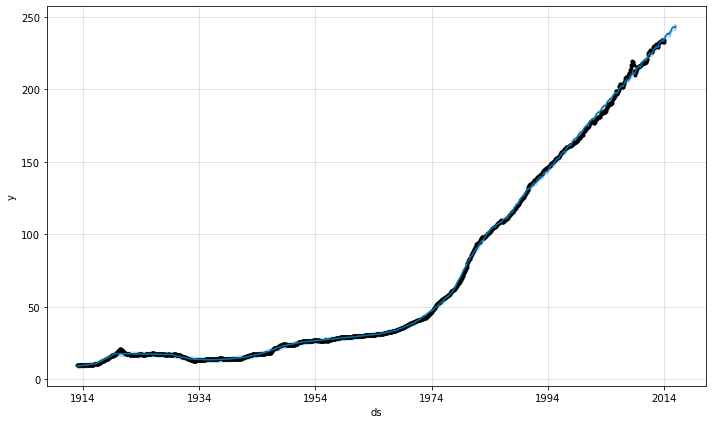

In [80]:
fig1 = model.plot(forecast)

c:\users\new\anaconda3\envs\ntf\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


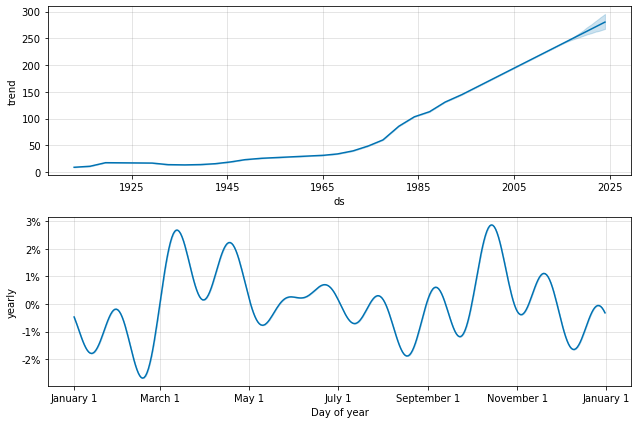

In [64]:
fig2 = model.plot_components(forecast)

In [29]:
series

,ds,Index,Inflation,FedMinWage
0,1913-01-01,9.800,0.00,0.00
1,1913-02-01,9.800,0.00,0.00
2,1913-03-01,9.800,0.00,0.00
3,1913-04-01,9.800,0.00,0.00
4,1913-05-01,9.700,-1.02,0.00
...,...,...,...,...
1208,2013-09-01,234.149,0.12,7.25
1209,2013-10-01,233.546,-0.26,7.25
1210,2013-11-01,233.069,-0.20,7.25
1211,2013-12-01,233.049,-0.01,7.25


In [65]:
inf = series[["ds","Inflation"]]
inf = inf.rename(columns={"Inflation":"y"})

In [66]:
inf

,ds,y
0,1913-01-01,0.00
1,1913-02-01,0.00
2,1913-03-01,0.00
3,1913-04-01,0.00
4,1913-05-01,-1.02
...,...,...
1208,2013-09-01,0.12
1209,2013-10-01,-0.26
1210,2013-11-01,-0.20
1211,2013-12-01,-0.01


In [68]:
model1 = Prophet(seasonality_mode="multiplicative")
model1.fit(inf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
future1 = model1.make_future_dataframe(periods=24, freq = "MS")
future1.tail()

,ds
1232,2015-09-01
1233,2015-10-01
1234,2015-11-01
1235,2015-12-01
1236,2016-01-01


In [74]:
forecast1 = model1.predict(future)
forecast1[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
4860,2023-12-28,0.041483,-0.755685,0.888028
4861,2023-12-29,0.041579,-0.752770,0.849106
4862,2023-12-30,0.041597,-0.793873,0.854245
4863,2023-12-31,0.041545,-0.773142,0.897737
4864,2024-01-01,0.041427,-0.785628,0.862416


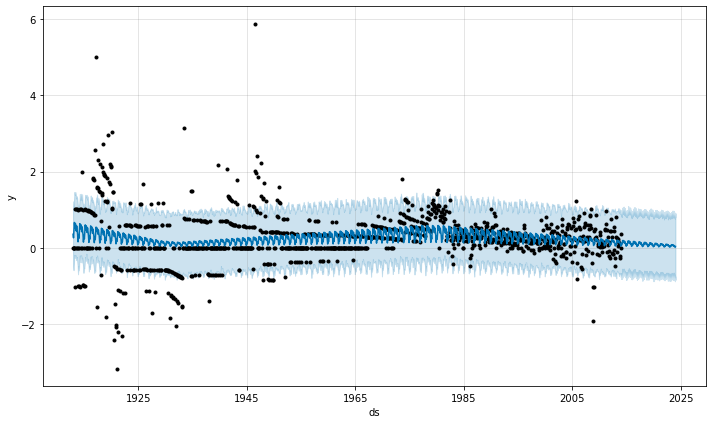

In [75]:
fig3 = model1.plot(forecast1)

c:\users\new\anaconda3\envs\ntf\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


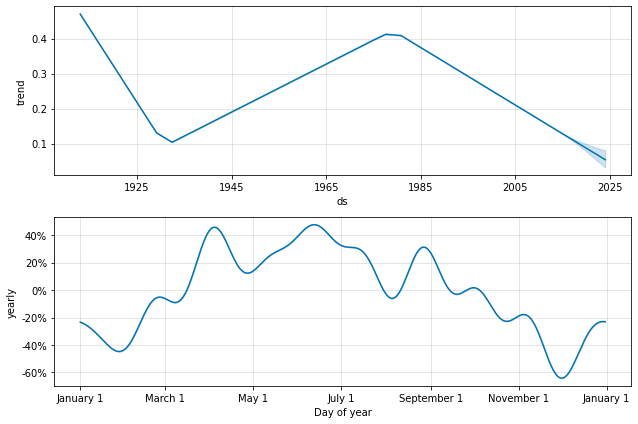

In [76]:
fig4 = model1.plot_components(forecast1)

In [83]:
fmw = series[["ds","FedMinWage"]]
fmw = fmw.rename(columns={"FedMinWage":"y"})
fmw

,ds,y
0,1913-01-01,0.00
1,1913-02-01,0.00
2,1913-03-01,0.00
3,1913-04-01,0.00
4,1913-05-01,0.00
...,...,...
1208,2013-09-01,7.25
1209,2013-10-01,7.25
1210,2013-11-01,7.25
1211,2013-12-01,7.25


In [85]:
model2 = Prophet(seasonality_mode="multiplicative")
model2.fit(fmw)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [86]:
future2 = model2.make_future_dataframe(periods=24, freq = "MS")
future2.tail()

,ds
1232,2015-09-01
1233,2015-10-01
1234,2015-11-01
1235,2015-12-01
1236,2016-01-01


In [87]:
forecast2 = model2.predict(future)
forecast2[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
1232,2015-09-01,7.412119,7.126916,7.685568
1233,2015-10-01,7.419138,7.150833,7.684473
1234,2015-11-01,7.418222,7.135910,7.684959
1235,2015-12-01,7.423014,7.119890,7.699694
1236,2016-01-01,7.434973,7.158344,7.703341


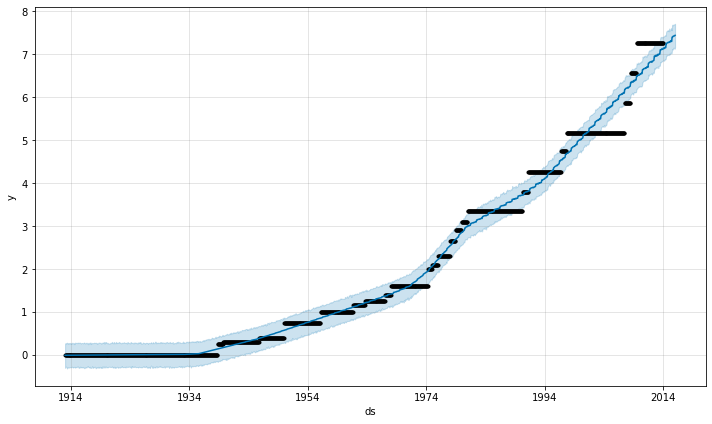

In [88]:
fig5 = model2.plot(forecast2)

c:\users\new\anaconda3\envs\ntf\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


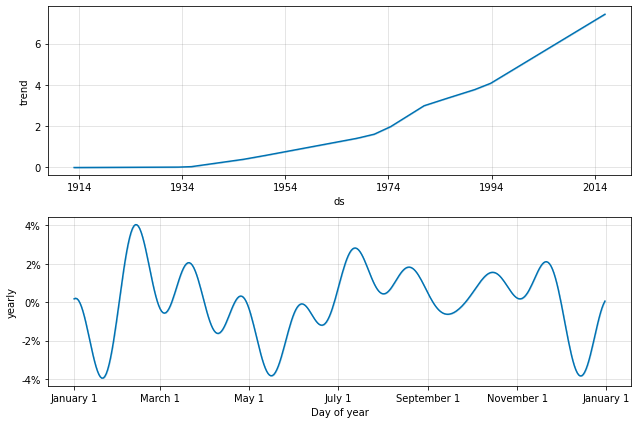

In [89]:
fig5 = model2.plot_components(forecast2)